In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_score
import sys 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pandas

In [2]:
dataset = pandas.read_csv('../dataset.csv', delimiter=',').sort_values(by='move_type').drop('Unnamed: 143', 1)


In [3]:
dataset.head()

,move_type,descr_number_0_x,descr_number_0_y,descr_number_1_x,descr_number_1_y,descr_number_2_x,descr_number_2_y,descr_number_3_x,descr_number_3_y,descr_number_4_x,...,descr_number_-5_x,descr_number_-5_y,descr_number_-4_x,descr_number_-4_y,descr_number_-3_x,descr_number_-3_y,descr_number_-2_x,descr_number_-2_y,descr_number_-1_x,descr_number_-1_y
150,GO,-9.586957e-17,1.947546e-16,0.329512,0.944152,0.371882,-0.096455,-0.013950,-0.208346,-0.216089,...,0.023832,-0.055872,-0.148591,0.122695,0.027279,-0.013152,0.022872,0.079131,0.022075,-0.063252
206,GO,-6.136932e-17,-1.744506e-16,-0.331556,0.943436,0.220299,0.230476,0.142787,-0.001575,0.065415,...,-0.098383,0.049373,0.135058,0.044619,0.076037,-0.006590,0.076453,-0.030447,-0.039809,-0.113276
205,GO,2.597293e-16,4.742989e-17,-0.582148,0.813083,0.058768,0.245973,0.052853,0.087676,0.027368,...,-0.043858,0.027601,0.083614,-0.049267,0.040450,-0.056175,0.056882,-0.085511,-0.099202,-0.138554
204,GO,1.491136e-16,2.287242e-16,-0.580837,0.814020,0.119369,0.305142,0.065140,0.078804,0.027761,...,0.002701,0.088887,0.054979,-0.033476,0.028367,-0.071916,0.029444,-0.091079,-0.106018,-0.148580
203,GO,3.158017e-16,1.965297e-16,-0.140147,0.990131,0.312879,0.172269,0.125018,-0.071382,0.058858,...,-0.124384,0.068589,0.072961,0.035087,0.091662,0.003118,0.044855,-0.019632,-0.021743,-0.153616


In [4]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=42)

# K-Means clustering

In [6]:
n_clusters = 134
score = []
validation = []
for i in range(2,n_clusters):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    score.append(kmeans.score(X_test, y_test))
    validation.append(kmeans.score(X_train, y_train))


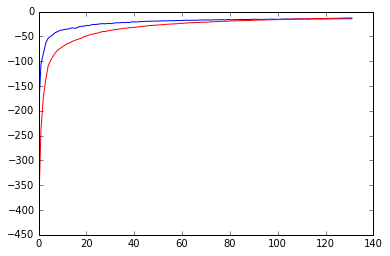

In [7]:
plt.plot(score)
plt.plot(validation, 'r')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=100, random_state=0, max_iter=10000).fit(X_train)

In [9]:
centers = kmeans.cluster_centers_


In [10]:
belong_to = kmeans.predict(features.values)
print(belong_to[:49])
print(belong_to[50:99])
print(belong_to[100:149])
print(belong_to[150:199])

[45 62 48 48 98 45 98  3 42 61 38 38 38 19 54 91 59 59 16 42 16 42 46  5  5
  5 90  5 70 45 11 42 46 42 19  5 46 19 57 47 94 40 40 36 94 21 25 62 98]
[57 77 21 94 40 57 47 16 36 40 54 19 57 57 54 54 54 57 36 40 40 54 38 25 45
 87 82 14 14 43 55 62 55 91 14 45  5 82 61 38 91 45 38 89 94 19 89 54 19]
[94 89 19 19 89 19 89 19 87 42 61 55 11 16 47 71 16 16 47 71 47  5 47 25  5
 91 46 62 73 80 61 70 70 45 70 27 90 42 27 90 42 47 47 16 25 90  5 54 77]
[ 5 11 11 11 90 42 14 77 41 83 92 41 11 41 92 92 41 92 80 87 59 25  5 90 38
 74 59 48 42 91 61 70  3  3 59 70 62 70  3 16 73 62 62 91 45 74 45 14 62]


In [11]:
def reconstruct(descriptors):
    """ reconstruct the image using the normalized descriptors and plot it
        Keyword arguments: 
         - descriptors : the normalized fourier descriptors
    """
    contour_reconstruct = np.fft.ifft(descriptors)
    contour_reconstruct = np.array(
        [contour_reconstruct.real, contour_reconstruct.imag])
    contour_reconstruct = np.transpose(contour_reconstruct)
    contour_reconstruct = np.expand_dims(contour_reconstruct, axis=1)
    # make positive
    if contour_reconstruct.min() < 0:
        contour_reconstruct -= contour_reconstruct.min()
    # normalization
    contour_reconstruct *= 800 / contour_reconstruct.max()
    # type cast to int32
    contour_reconstruct = contour_reconstruct.astype(np.int32, copy=False)
    black = np.zeros((800, 800), np.uint8)
    # draw and visualize
    cv2.drawContours(black, [contour_reconstruct], -1, (255,0,255), 3)
    cv2.imshow("Reconstruction", black)
    cv2.waitKey(10000)
    cv2.imwrite("reconstruct_result.jpg", black)
    cv2.destroyAllWindows()

### To run if dataset and not dataset norm 

In [12]:
img_nb = 10
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
complex_descriptors
reconstruct(complex_descriptors)
cv2.waitKey(1000)
labels[3]

'GO'

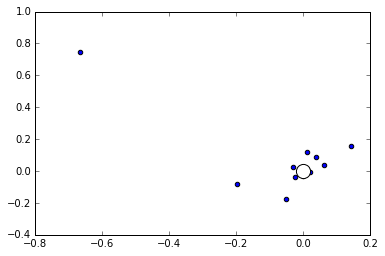

In [13]:
plt.scatter(X_test[7][3::2],X_test[7][2::2] )
plt.scatter(centers[1, 0], centers[1, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# KNN clustering

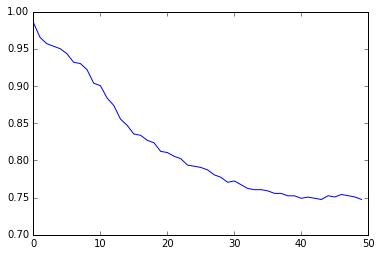

In [14]:
# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(cv_scores)
plt.show()

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='distance').fit(X_train,y_train ) 

In [16]:
knn_belong_to = knn_classifier.predict(features.values)

In [17]:
test_prediction = knn_classifier.predict(X_test)

In [18]:
missclassified = 0
for i in range(len(y_test)):
    if y_test[i] != test_prediction[i]: 
        missclassified = missclassified +1
print(missclassified)

7


## Feedforward Neural Network 

In [19]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',
                     hidden_layer_sizes=(41), random_state=1, 
                     max_iter = 10000, early_stopping=True)

clf.fit(X_train,y_train)                         
test_fnn_prediction = clf.predict(X_test)
test_fnn_overfit = clf.predict(X_train)

In [20]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != test_fnn_prediction[i]: 
        print("{} missclassified as {} number {}".format(y_test[i], test_fnn_prediction[i], i))
        count +=1
        
print(count/len(y_test)*100)


STOP missclassified as GO number 25
STOP missclassified as GO number 73
GO missclassified as STOP number 154
GO missclassified as STOP number 157
LEFT missclassified as STOP number 174
STOP missclassified as GO number 256
GO missclassified as STOP number 282
2.356902356902357


In [21]:
for i in range(len(y_train)):
    if y_train[i] != test_fnn_overfit[i]: 
        print("{} missclassified as {}".format(y_train[i], test_fnn_overfit[i]))
        count +=1
        
print(count/len(y_train)*100)

1.1627906976744187


In [22]:
# check the incorrect data 
dataset_prediction = clf.predict(features.values)
for i in range(len(labels.values)):
    if labels.values[i] != dataset_prediction[i]: 
        print("{} missclassified as {} number {}".format(labels.values[i], dataset_prediction[i], i))
        count +=1
        
print(count/len(labels.values)*100)

GO missclassified as STOP number 69
GO missclassified as STOP number 77
GO missclassified as STOP number 82
LEFT missclassified as STOP number 436
STOP missclassified as GO number 842
STOP missclassified as GO number 854
STOP missclassified as GO number 892
1.557285873192436


In [24]:
img_nb = 50
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
complex_descriptors
reconstruct(complex_descriptors)
labels[3]

'GO'